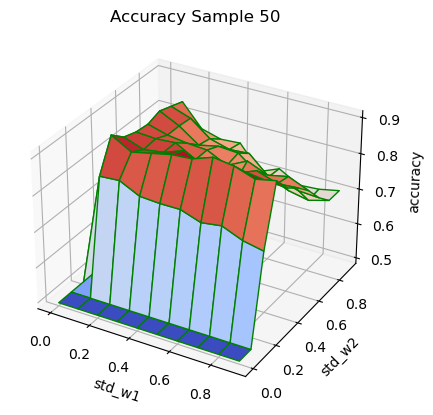

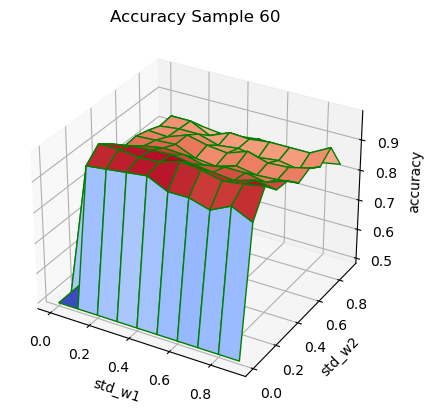

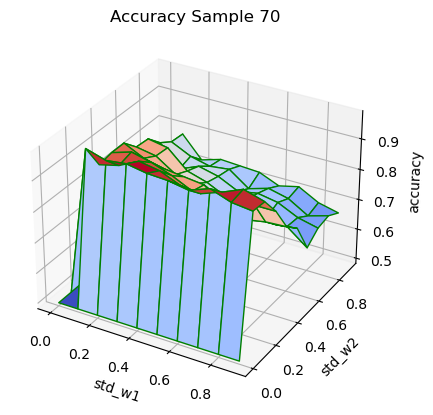

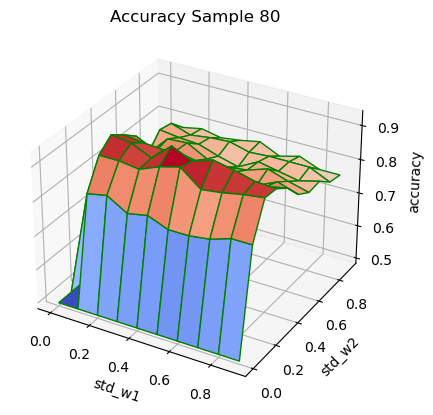

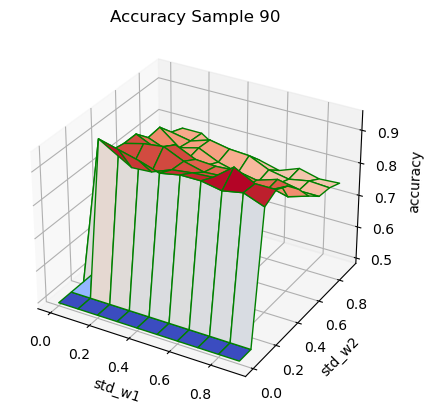

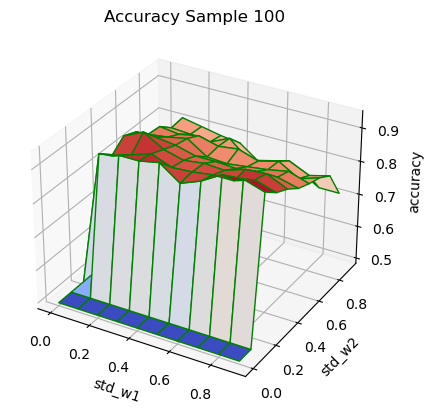

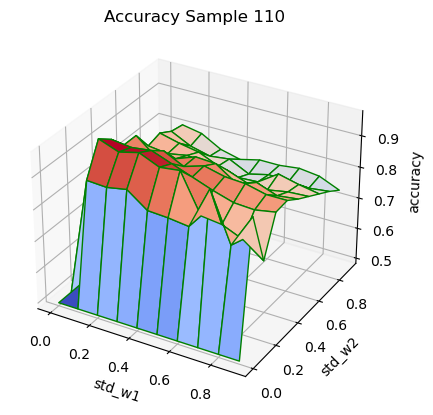

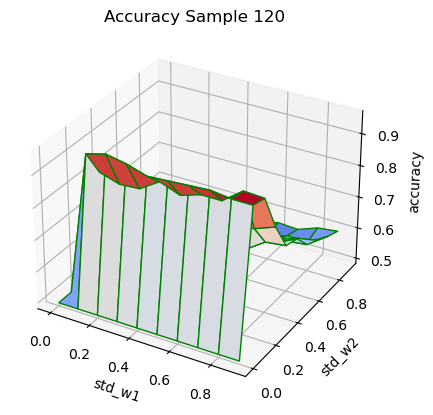

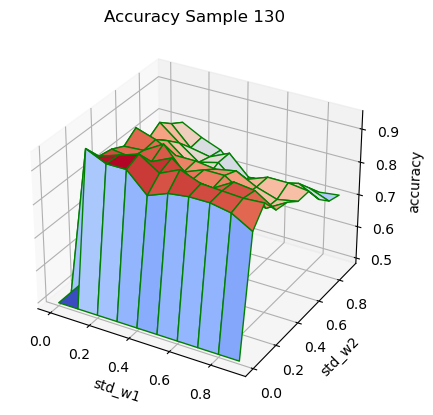

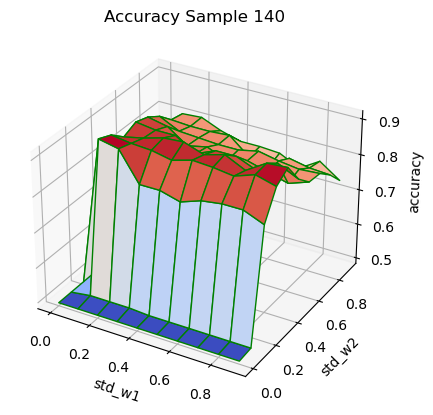

In [1]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input150sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0,1,0.1)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(std_w_range,std_w_range)
accuracy_10_samples = np.zeros((10,10,10))
for (i,sample) in zip(range(len(sample_list)),sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.plot_surface(std_w1_axis, std_w2_axis, data['accuracy_w1_w2'], cmap ='coolwarm', edgecolor ='green')
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_zlabel('accuracy')
    ax.set_title('Accuracy Sample {}'.format(sample))
    fig.savefig("150_inputs_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in zip(range(len(axis_std_w1)),axis_std_w1):
        for (k,std_w2) in zip(range(len(axis_std_w2)), axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]


In [2]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
average_accuracy_grid_10_by_10_10_samples

array([[0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.7453125 , 0.74375   , 0.74179688, 0.7296875 ,
        0.72617188, 0.72539062, 0.74023438, 0.72578125, 0.72890625],
       [0.4921875 , 0.9046875 , 0.90273437, 0.89570313, 0.89335937,
        0.890625  , 0.87421875, 0.87851563, 0.88398438, 0.87148437],
       [0.4921875 , 0.89882812, 0.88046875, 0.87148437, 0.87734375,
        0.86601562, 0.87539062, 0.88476562, 0.88203125, 0.87773437],
       [0.4921875 , 0.8734375 , 0.85742188, 0.85625   , 0.84492188,
        0.84648437, 0.8421875 , 0.8375    , 0.8421875 , 0.85078125],
       [0.4921875 , 0.85273438, 0.82890625, 0.82617188, 0.81289062,
        0.8140625 , 0.81054688, 0.81445312, 0.81679687, 0.81640625],
       [0.4921875 , 0.815625  , 0.81289062, 0.80039063, 0.78671875,
        0.77578125, 0.79375   , 0.79023438, 0.78984375, 0.78476563],
       [0.4921875 , 0.81445312, 0.7886718

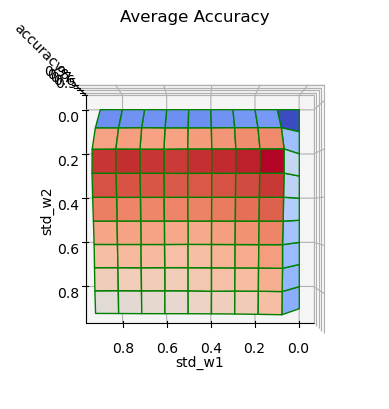

In [3]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(std_w1_axis, std_w2_axis, average_accuracy_grid_10_by_10_10_samples, cmap ='coolwarm', edgecolor ='green')
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_zlabel('accuracy')
ax.set_title('Average Accuracy')
ax.view_init(90,90)
fig.savefig("150_inputs_average_accuracy_grid_over_10_samples.png".format(sample))

In [4]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax(average_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_accuracy_grid_10_by_10_10_samples.shape)

In [5]:
best_w1_w2

(2, 1)

In [6]:
array_best_w1_best_w2 = np.array(best_w1_w2)*0.1

In [7]:
average_accuracy_grid_10_by_10_10_samples[2]

array([0.4921875 , 0.9046875 , 0.90273437, 0.89570313, 0.89335937,
       0.890625  , 0.87421875, 0.87851563, 0.88398438, 0.87148437])

In [8]:
average_accuracy_grid_10_by_10_10_samples[:,1]

array([0.4921875 , 0.7453125 , 0.9046875 , 0.89882812, 0.8734375 ,
       0.85273438, 0.815625  , 0.81445312, 0.79335937, 0.77851563])

In [9]:
average_accuracy_grid_10_by_10_10_samples >= 0.999*np.max(average_accuracy_grid_10_by_10_10_samples)

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [10]:
data = {}
data['N'] = 150
data['w1'] = array_best_w1_best_w2[0]/0.3445
data['std_dev_w1_10_samples'] = 0.1/0.3445
data['w2'] = array_best_w1_best_w2[1]/0.3445
data['std_dev_w2_10_samples'] = 0.1/0.3445
np.savez("150_input_neurons_w1_w2.npz",**data)